# 2 Systems of difference equations

If there are multiple variables that are related through some kind of linear function, we can express the system of equations in matrix-vector notation. Simulating the system then works exactly the same way as previously, with the only difference that we are iterating an equation that consists of matrices and vectors, rather than scalars. In this tutorial, we will also touch upon transforming a higher-order system into a first-order system of higher dimensionality, as it makes the computation somewhat simpler.

Linear algebra is built into MATLAB --- it's the MATrix LABoratory, after all, and comes with a variety of highly optimised, numerically stable routines.

In [1]:
% this renders text in figures in Latex font
set(groot, "DefaultTextInterpreter", "latex")
set(groot, "DefaultAxesTickLabelInterpreter", "latex")
set(groot, "DefaultLegendInterpreter", "latex")

% MATLAB does not have a useful built-in for drawing arrows :P
drawArrow = @(x, y, varargin) quiver(x(1), y(1), x(2)-x(1), y(2)-y(1), 0, varargin{:});

### 2.1 First-order 2D system

Consider the 2-dimensional system from tutorial 2, exercise 1:

$y_{t+1} = 0.7y_t + 0.3 z_t\\ z_{t+1} = 0.1y_t + 0.75 z_t + 15\\y_0=225;z_0=25$

##### EXERCISE

* re-write the system as a single equation of the form $\mathbf{x}_{t+1} = \mathbf{Ax}_t + \mathbf{g}_t$
* use matrix multiplication to implement one time step in a function

Try the first part (re-writing the equation) on paper first to get a better intuition for the problem.

##### SOLUTION

equation:
$\left(\begin{matrix}
        y_{t+1} \\z_{t+1}
    \end{matrix}\right) = \left(\begin{matrix}
            0.7 & 0.3\\
            0.1 & 0.75
        \end{matrix}\right)\left(\begin{matrix}
        y_{t} \\z_{t}
    \end{matrix}\right) +
        \left(\begin{matrix}
            0 \\ 15
        \end{matrix}\right)$

Use `*` for matrix multiplication MATLAB (element-wise multiplication, should you ever need is, is `.*`).

In [2]:
system_1step = @(yz_t, A, g) A*yz_t+g;

##### EXERCISE

Create the vectors `yz_0`, `g`, and the coefficient matrix `A`: 

##### SOLUTION

Use column vectors and matrices in MATLAB. `;` separates rows.

In [3]:
yz_0 = [225; 25];
A    = [0.7 0.3; 0.1 0.75];
g    = [0; 15];

##### EXERCISE

Write a for loop to iterate through the system $T$ times. Store the results in a $2\times (T+1)$ numpy array (one row per variable). Note that, unlike in Python, indices start at 1, not 0. Hence, we first create an empty array of the size we will need to store all results. The second dimension is $T+1$, not $T$ because we will obtain $T$ results, and we start with one set of initial values.

Implementing the for-loop is identical to the last tutorial, but now you have to be careful to use correct indexing, so that simulation results are stored correctly in the pre-defined array.

In [4]:
T = 25;

% results array
results = NaN(2, T+1);
% store initial values in results array
results(:, 1) = yz_0;

% before we apply the equation (function above) iteratively, 
% a few checks to ensure the matrix and vector dimensions match
assert(height(A) == width(A))        % square matrix
assert(numel(yz_0) == width(A))      % same length of vector and matrix
assert(isequal(size(yz_0), size(g))) % same length of vectors

% loop
for t = 1:T
    % store the results in the correct part of the array!
    results(:, t+1) = system_1step(results(:, t), A, g);
end

In [5]:
disp(results)

   1.0e+02 *

  Columns 1 through 8

   2.250000000000000   1.650000000000000   1.323750000000000   1.147687500000000   1.053890625000000   1.005036093750000   0.980626476562500   0.969415524609375
   0.250000000000000   0.562500000000000   0.736875000000000   0.835031250000000   0.891042187500000   0.923670703125000   0.943256636718750   0.955505125195312

  Columns 9 through 16

   0.965242404785156   0.964740802256836   0.966079172903760   0.968268103593318   0.970779559622950   0.973337650174585   0.975803710739788   0.978113243736273
   0.963570396357422   0.969202037746582   0.973375608535620   0.976639623692091   0.979306528128400   0.981557852058595   0.983502154061405   0.985206986620032

  Columns 17 through 24

   0.980241366601401   0.982183925922576   0.983947216120042   0.985542420042385   0.986982637082038   0.988281325847974   0.989451517123954   0.990505443534986
   0.986716564338652   0.988061559914129   0.989264562527854   0.990343143507895   0.991311599635160   0.99

To examine the results, we will create one plot in which both variables are plotted over time, and one in the phase space. I use the `tiledlayout` feature in MATLAB to combine both plots in a single figure; this is preferable to the old approach of using `subplot` that is still sometimes seen in older code.

Moreover, I am plotting the isoclines in the phase space. Those are lines at which *one* of the variables is in steady state. The intersection is obviously the point at which the entire system is in steady state. We calculate it by using the equation of one variable, setting it to its steady state value, and solving it so that we have a functional form of one variable in dependence of the other. Here that means:

Isocline of y:

$\bar{y} = 0.7\bar{y} + 0.3z_t \Leftrightarrow \bar{y}=z_t$

and of z:

$\bar{z} = 0.1y_t + 0.75\bar{z} + 15 \Leftrightarrow \bar{z} = 0.4y_t + 60$

Since this is a linear system, the isoclines are also linear functions in the phase space.

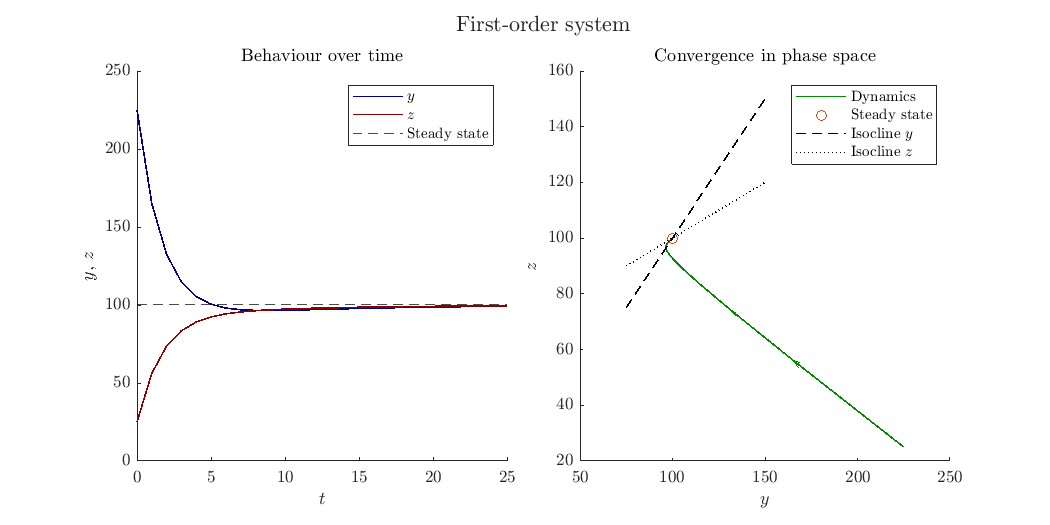

In [6]:
fig = figure(Position = [0 0 840 420]);
tiledlayout(1, 2, TileSpacing = "compact")
sgtitle("First-order system", Interpreter = "latex")

nexttile
title("Behaviour over time")
hold on
plot(0:T, results(1, :), Color = "#00008B", DisplayName = "$y$", LineWidth = 1)
plot(0:T, results(2, :), Color = "#8B0000", DisplayName = "$z$", LineWidth = 1)
yline(100, LineStyle = "--", Color = "black", DisplayName = "Steady state", LineWidth = 1)
legend show
xlabel("$t$")
ylabel("$y$, $z$")

%%

nexttile
title("Convergence in phase space")
hold on
plot(results(1, :), results(2, :), Color = "#008B00", DisplayName = "Dynamics", LineWidth = 1)
scatter(100, 100, Color = "black", DisplayName = "Steady state")

%%

% isoclines
y = [75 150]; % two points are enough for straight lines
ybar = y;
zbar = 0.4*y + 60;
% plot iscoclines
plot(y, ybar, LineStyle = "--", Color = "black", LineWidth = 1, DisplayName = "Isocline $y$")
plot(y, zbar, LineStyle = ":", Color = "black", LineWidth = 1, DisplayName = "Isocline $z$")

legend(AutoUpdate = "off")

% arrows for the first 3 steps to indicate direction of motion
for i = 1:3
    x = results(1, i);
    y = results(2, i);
    x2 = results(1, i+1);
    y2 = results(2, i+1);
    drawArrow([x x2], [y y2], Color = "#008B00", AutoScale = "off")
end
    
xlabel("$y$")
ylabel("$z$")

Zoom into the phase space to see more detail of the behaviour in the vincinity of the steady state. As a bonus exercise, you could try to run this system from many different starting points and plot a variety of paths in the phase space, to show the converging behaviour from all points of the phase space.

### 2.2 Second-order difference equation as first-order 2D system

In the second exercise, we will convert the second-order difference equation from the first PC tutorial $y_t = 1.1y_{t-1} - 0.6y_{t-2} + 1100$ into a 2-dimensional system of first-order equations.

##### EXERCISE

First, set up the first-order system (2d system of first-order differential equations).

Use as initial conditions the same as last time: $y_0 = 1300$, $y_1 = 1600$, or $y_1 = 1600$ and $z_1 = 1300$.  You can then apply your 1-step function `system_1step` from above, with a new initial vector `yz_0`, and a different coefficient matrix `A` and inhomogeneous part `g`.

Try to re-write the system on paper first, that will make it easier.

##### SOLUTION

We introduce an auxiliary variable $z_t = y_{t-1}$. The equation then becomes the following first order system

$y_t = 1.1y_{t-1} - 0.6 z_{t-1} + 1100 \\z_t = y_{t-1}$

Now, write it as a single vector equation:

$\left(\begin{matrix}
        y_{t} \\z_{t}
    \end{matrix}\right) = \left(\begin{matrix}
            1.1 & -0.6\\
            1 & 0
        \end{matrix}\right)\left(\begin{matrix}
        y_{t-1} \\z_{t-1}
    \end{matrix}\right) +
        \left(\begin{matrix}
            1100 \\ 0
        \end{matrix}\right)$

Use as initial conditions the same as last time: $y_0 = 1300$, $y_1 = 1600$, or $y_1 = 1600$ and $z_1 = 1300$. You can then apply your 1-step function from above

In [7]:
yz_0 = [1600; 1300];
A    = [1.1 -0.6; 1 0];
g    = [1100; 0];

T = 25;

results2 = NaN(2, T+1);
results2(:, 1) = yz_0;

% iterate T times
for t = 1:T
    results2(:, t+1) = system_1step(results2(:, t), A, g);
end

Next, we can draw a similar plot to the one above. There is no need to plot $z_t$ over time, since it is $y_{t-1}$ and therefore does not add any information. Note what the oscillatory behaviour translates to in the phase space: the convergence happens in circles around the steady state. This is because the coefficient matrix relates to a rotation in the phase space, if we interpret it geometrically.

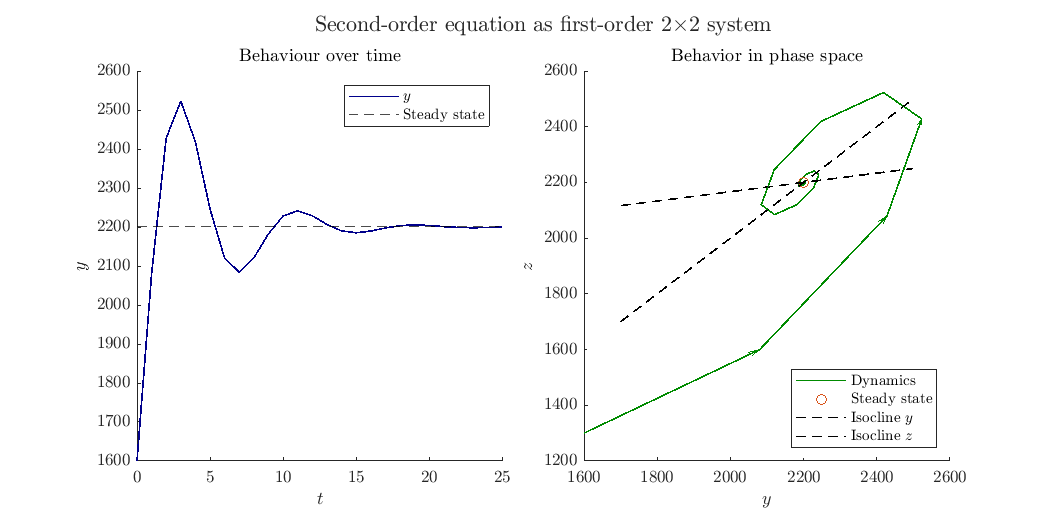

In [8]:
fig = figure(Position = [0 0 840 420]);
tiledlayout(1, 2, TileSpacing = "compact")
sgtitle("Second-order equation as first-order 2$\times$2 system", Interpreter = "latex")

nexttile
title("Behaviour over time")
hold on
plot(0:T, results2(1, :), Color = "#00008B", DisplayName = "$y$", LineWidth = 1)
yline(2200, LineStyle = "--", Color = "black", DisplayName = "Steady state", LineWidth = 1)
legend show
xlabel("$t$")
ylabel("$y$")

%%

nexttile
title("Behavior in phase space")
hold on
plot(results2(1, :), results2(2, :), Color = "#008B00", DisplayName = "Dynamics", LineWidth = 1)
scatter(2200, 2200, Color = "black", DisplayName = "Steady state")

%%

% isoclines
y = [1700 2500]; % two points are enough for straight lines
ybar = y / 6 + 1100 / 0.6;
zbar = y;
% plot iscoclines
plot(y, ybar, LineStyle = "--", Color = "black", LineWidth = 1, DisplayName = "Isocline $y$")
plot(y, zbar, LineStyle = "--", Color = "black", LineWidth = 1, DisplayName = "Isocline $z$")

legend(AutoUpdate = "off", Location = "southeast")

% arrows for the first 3 steps to indicate direction of motion
for i = 1:10
    x = results2(1, i);
    y = results2(2, i);
    x2 = results2(1, i+1);
    y2 = results2(2, i+1);
    drawArrow([x x2], [y y2], Color = "#008B00", AutoScale = "off")
end
    
xlabel("$y$")
ylabel("$z$")